In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X = np.arange(0,1,0.02).reshape(-1,1)
y = 0.7*X + 0.3

print(X[:5],y[:5])
print("Shape of X =",X.shape)
print("Shape of y =",y.shape)

[[0.  ]
 [0.02]
 [0.04]
 [0.06]
 [0.08]] [[0.3  ]
 [0.314]
 [0.328]
 [0.342]
 [0.356]]
Shape of X = (50, 1)
Shape of y = (50, 1)


In [3]:
 # Split innto training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=29)

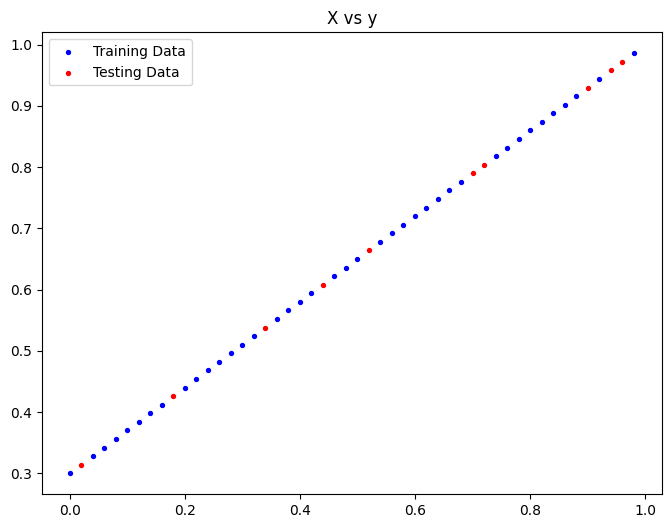

In [8]:
def plot_data(X_train=X_train,y_train=y_train,X_test=X_test,
              y_test=y_test,predictions=None):
    plt.figure(figsize=(8,6))
    plt.scatter(X_train,y_train,c='b',s=8,label="Training Data")
    plt.scatter(X_test,y_test,c='r',s=8,label="Testing Data")
    if predictions is not None:
        plt.scatter(X_test,predictions,c='g',s=8,label='Prediction Data')
    plt.legend()    
    plt.title("X vs y")
    plt.show() 
plot_data()    

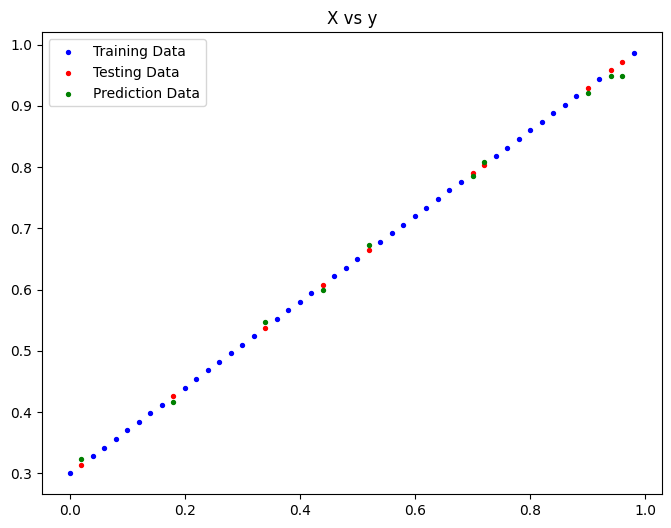

In [9]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train,y_train)
y_preds = knr.predict(X_test)
plot_data(predictions=y_preds)

In [12]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print (f"MSE ={mean_squared_error(y_test,y_preds):.4f}")
print (f"MSE ={mean_absolute_error(y_test,y_preds):.4f}")
print (f"R^2 Score = {r2_score(y_test, y_preds):.4f}")


MSE =0.0001
MSE =0.0098
R^2 Score = 0.9975


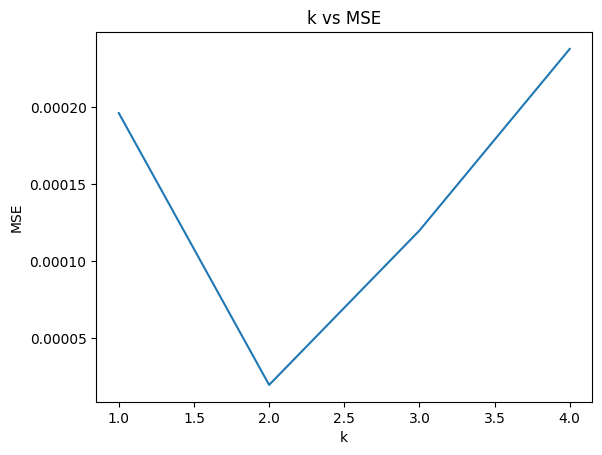

Best value of k = 2


In [17]:
best_mse = []
for k in range(1,5):
    knr=KNeighborsRegressor(n_neighbors=k)
    knr.fit(X_train,y_train)
    y_preds = knr.predict(X_test)
    best_mse.append(mean_squared_error(y_test,y_preds))

plt.plot(range(1,5),best_mse)
plt.title("k vs MSE")
plt.xlabel('k')
plt.ylabel('MSE')
plt.show()

best_k = range(1,5)[np.argmin(best_mse)]
print(f'Best value of k = {best_k}')

In [16]:
print (f"MSE ={mean_squared_error(y_test,y_preds):.4f}")
print (f"MSE ={mean_absolute_error(y_test,y_preds):.4f}")
print (f"R^2 Score = {r2_score(y_test, y_preds):.4f}")


MSE =0.0002
MSE =0.0105
R^2 Score = 0.9950
